# Ray Casting a Sphere

### Code

In [2]:
from sympy import *
init_printing()

In [3]:
from matplotlib import pyplot
%matplotlib inline

In [4]:
def draw_figure():
    circle = pyplot.Circle((1.3, 0.5), 0.3, color="black", fill=False)
    fig, ax = pyplot.subplots()
    ax.add_patch(circle)
    pyplot.xlim(0, 2)
    pyplot.ylim(0, 1)
    pyplot.plot(1.3, 0.5, marker="o", markersize=10, color="blue")
    pyplot.plot(1.018, 0.605, marker="o", markersize=10, color="blue")
    pyplot.plot(1.50, 0.725, marker="o", markersize=10, color="blue")
    pyplot.plot(0.2, 0.4, marker="o", markersize=10, color="blue")
    pyplot.plot(1.87, 0.82, marker="o", markersize=10, color="blue")
    pyplot.arrow(0.2, 0.4, 1.6, 0.4, head_width=0.05, color="black", linestyle="dashed")
    pyplot.arrow(1.3, 0.5, -0.22, -0.15, head_width=0.02, color="black")
    pyplot.gca().set_aspect("equal")
    pyplot.gcf().set_size_inches(10, 6)
    pyplot.annotate("$\\vec{V}$", (0.11, 0.37), size=28)
    pyplot.annotate("$\\vec{P}$", (1.9, 0.80), size=28)
    pyplot.annotate("$\\vec{F}$", (0.94, 0.60), size=28)
    pyplot.annotate("$\\vec{B}$", (1.58, 0.64), size=28)
    pyplot.annotate("$\\vec{C}$", (1.32, 0.40), size=28)
    pyplot.annotate("r", (1.13, 0.43), size=18)
    pyplot.axis("off")
    pyplot.title("Sphere Ray Casting", size=28)

### Figure 1

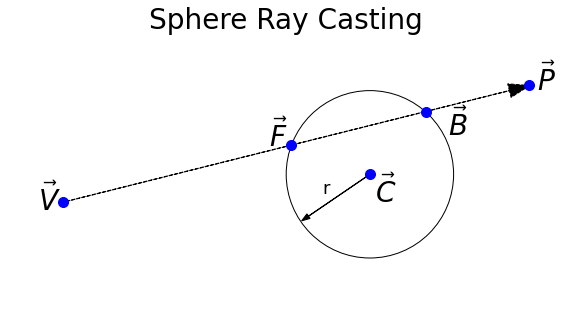

In [5]:
draw_figure()

$\vec{C}$ : the center of the sphere

$r$ : the radius of the sphere

$\vec{V}$ : viewpoint / camera / eye location; start of the view ray

$\vec{P}$ : the location of the imposter geometry at the current pixel; end of the view ray

$\vec{F}$ : the first / front intersection of the view ray with the sphere

$\vec{B}$ : the second / back intersection of the view ray with the sphere

Given $\vec{C}$, $r$, $\vec{V}$, $\vec{P}$, compute $\vec{F}$

In [6]:
# View point
v_x, v_y, v_z = symbols("v_x, v_y, v_z")
V = Matrix([v_x, v_y, v_z])
# Sphere center
c_x, c_y, c_z = symbols("c_x, c_y, c_z")
C = Matrix([c_x, c_y, c_z])
# Imposter geometry position
p_x, p_y, p_z = symbols("p_x, p_y, p_z")
P = Matrix([p_x, p_y, p_z])
V, C, P

⎛⎡vₓ ⎤  ⎡cₓ ⎤  ⎡pₓ ⎤⎞
⎜⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎟
⎜⎢v_y⎥, ⎢c_y⎥, ⎢p_y⎥⎟
⎜⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎟
⎝⎣v_z⎦  ⎣c_z⎦  ⎣p_z⎦⎠

In [7]:
Cv = symbols("\\vec{C}")
Xv = symbols("\\vec{X}")

## The Ray Equation

In [14]:
t = symbols("t")  # The ray parameter
x_x, x_y, x_z = symbols("x_x, x_y, x_z")
X = Matrix([x_x, x_y, x_z])  # Some point along the ray
V + t * (P - V)
ray_eqn = Eq(X, V + t * (P - V))
ray_eqn

⎡xₓ ⎤   ⎡ t⋅(pₓ - vₓ) + vₓ  ⎤
⎢   ⎥   ⎢                   ⎥
⎢x_y⎥ = ⎢t⋅(p_y - v_y) + v_y⎥
⎢   ⎥   ⎢                   ⎥
⎣x_z⎦   ⎣t⋅(p_z - v_z) + v_z⎦

## Implicit Sphere Equation

In [28]:
r = symbols("r")  # Radius of the sphere
# Eq(r * r, (X - C) @ (X - C))
sphere_eqn = Eq(r * r, ((X - C).T * (X - C))[0])
sphere_eqn

## Plug the sphere equation into the ray equation

In [32]:
eqn = ((X - C).T * (X - C))[0] - r * r
eqn = eqn.subs(x_x, t * (p_x - v_x) + v_x)
eqn = eqn.subs(x_y, t * (p_y - v_y) + v_y)
eqn = eqn.subs(x_z, t * (p_z - v_z) + v_z)
eqn

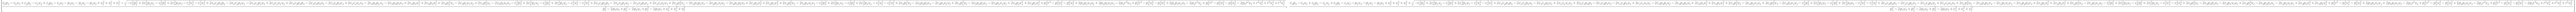

In [34]:
t_eqn = solve(eqn, t)
t_eqn

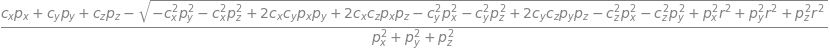

In [36]:
# Case: viewpoint at origin:
view_origin_t_eqn = simplify(t_eqn[0].subs(v_x, 0).subs(v_y, 0).subs(v_z, 0))
view_origin_t_eqn

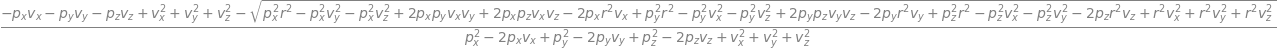

In [37]:
# Case: sphere at origin
sphere_origin_t_eqn = simplify(t_eqn[0].subs(c_x, 0).subs(c_y, 0).subs(c_z, 0))
sphere_origin_t_eqn